# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [43]:
import pandas as pd

In [44]:
df = pd.read_csv("../data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [46]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [47]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [48]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [49]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']
X_encoded = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.33, random_state=42)

# Train a Random Forest classifier with optimized hyperparameters
clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
mean_cv_score = cv_scores.mean()

# Output variable importance
importance = clf.feature_importances_
feature_names = X_encoded.columns

In [51]:
mean_cv_score

0.8501492537313433

In [52]:
for i in range (0, 10):
    print(feature_names[i], ':', importance[i])

num_passengers : 0.02016715221470251
purchase_lead : 0.05084519784628979
length_of_stay : 0.08425464552238443
flight_hour : 0.040588242464038825
flight_day : 0.03180817307067211
wants_extra_baggage : 0.03316086245338304
wants_preferred_seat : 0.019165622132842414
wants_in_flight_meals : 0.016720333667421084
flight_duration : 0.06529022465593848
sales_channel_Mobile : 0.014628477396990365


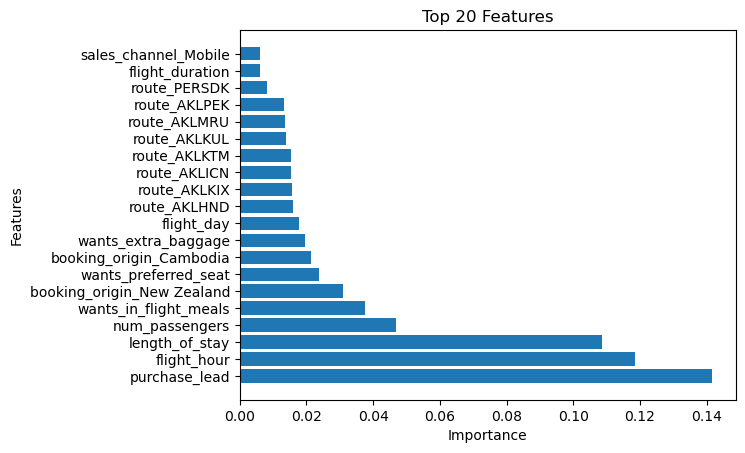

In [60]:
# Sort feature importance values in descending order
sorted_importance = sorted(enumerate(clf.feature_importances_), key=lambda x: x[1], reverse=True)

# Extract the top 20 features and their importance values
top_indices = [index for index, _ in sorted_importance[:20]]
top_features = [feature_names[index] for index in top_indices]
top_importance = [clf.feature_importances_[index] for index in top_indices]

# Create the bar plot with the top 20 features
plt.barh(top_features, top_importance)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 20 Features')
plt.show()

In [54]:
sorted_importance

[(860, 0.14527902845499285),
 (813, 0.13474360349670653),
 (2, 0.08425464552238443),
 (8, 0.06529022465593848),
 (1, 0.05084519784628979),
 (3, 0.040588242464038825),
 (728, 0.035913608428636265),
 (5, 0.03316086245338304),
 (4, 0.03180817307067211),
 (0, 0.02016715221470251),
 (846, 0.019920120709889463),
 (6, 0.019165622132842414),
 (481, 0.017373509238178885),
 (7, 0.016720333667421084),
 (440, 0.016166564328370117),
 (9, 0.014628477396990365),
 (894, 0.011316132670364838),
 (889, 0.009932842748697653),
 (826, 0.009719722483407663),
 (902, 0.009357005527759624),
 (433, 0.008269678646511893),
 (587, 0.0074196289744017895),
 (53, 0.0069181330394411725),
 (650, 0.006108662629915463),
 (608, 0.006003972676293229),
 (17, 0.005858427019681384),
 (900, 0.005243734386933947),
 (712, 0.005216650688935286),
 (852, 0.004569164757089505),
 (553, 0.0045469991514299),
 (427, 0.00452968356154269),
 (870, 0.0045235922179939735),
 (430, 0.0038758501959502093),
 (449, 0.0037119666359158475),
 (298, 0

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Perform one-hot encoding for categorical features
cat_features = ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']
X_encoded = pd.get_dummies(df[X.columns], columns=cat_features)

# Split the encoded data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.33, random_state=42)

# Train a RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate prediction correctness
correctness = (y_pred == y_test)

# Calculate cumulative correctness
cumulative_correctness = np.cumsum(correctness)

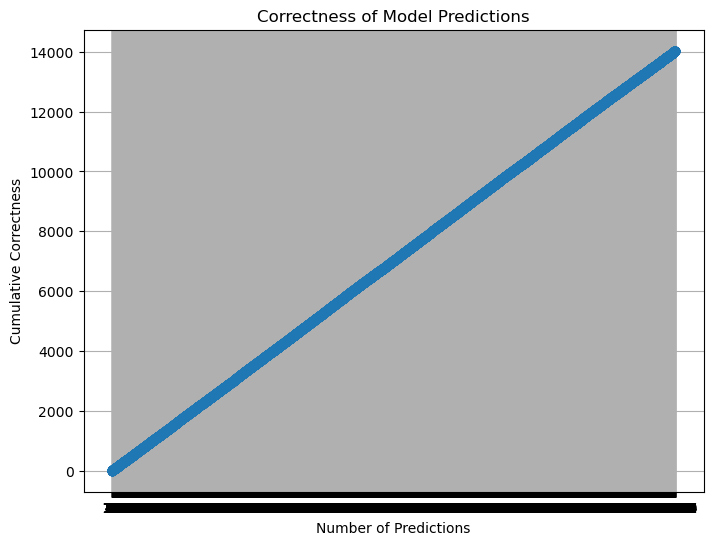

Accuracy: 0.8506060606060606


In [56]:
# Generate x-axis values
x = np.arange(1, len(correctness) + 1)

# Plot the correctness of predictions
plt.figure(figsize=(8, 6))
plt.plot(x, cumulative_correctness, marker='o')
plt.xlabel('Number of Predictions')
plt.ylabel('Cumulative Correctness')
plt.title('Correctness of Model Predictions')
plt.xticks(np.arange(1, len(correctness) + 1))
plt.grid(True)
plt.show()

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

In [37]:
print(len(correctness))

16500


In [41]:
np.cumsum(correctness)

33553        1
9427         2
199          3
12447        4
39489        5
         ...  
27615    14041
21964    14041
33321    14042
40225    14042
28203    14043
Name: booking_complete, Length: 16500, dtype: int32

In [40]:
y_pred != y_test

33553    False
9427     False
199      False
12447    False
39489    False
         ...  
27615    False
21964     True
33321    False
40225     True
28203    False
Name: booking_complete, Length: 16500, dtype: bool